# Weekly Awesome Tricks And Best Practices From Kaggle
## Easily learn what is only learnt by hard practice
<img src='images/forest.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@jplenio?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Johannes Plenio</a>
        on 
        <a href='https://www.pexels.com/photo/silhouette-of-a-man-during-sunset-1114897/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
houses = pd.read_csv('data/melb_data.csv')

### Intro to This Project

### 1. Plotting Only the Lower Part of Correlation Matrix

A good correlation matrix can tell a lot about your dataset. It is common to plot it to see the pairwise correlation between your features and the target variable. According to your needs, you can decide which features to keep and feed to your ML algorithm. 

But today, datasets contain so many features that it can be overwhelming to look at correlation matrices like below:

<img src='images/corr.png'></img>

However nice, there is just too much information to take in. Mostly, correlation matrices are symmetrical along the main diagonal, so they contain duplicate data. Also, the diagonal itself is useless. Let's see how we can plot only the useful half of the matrix:

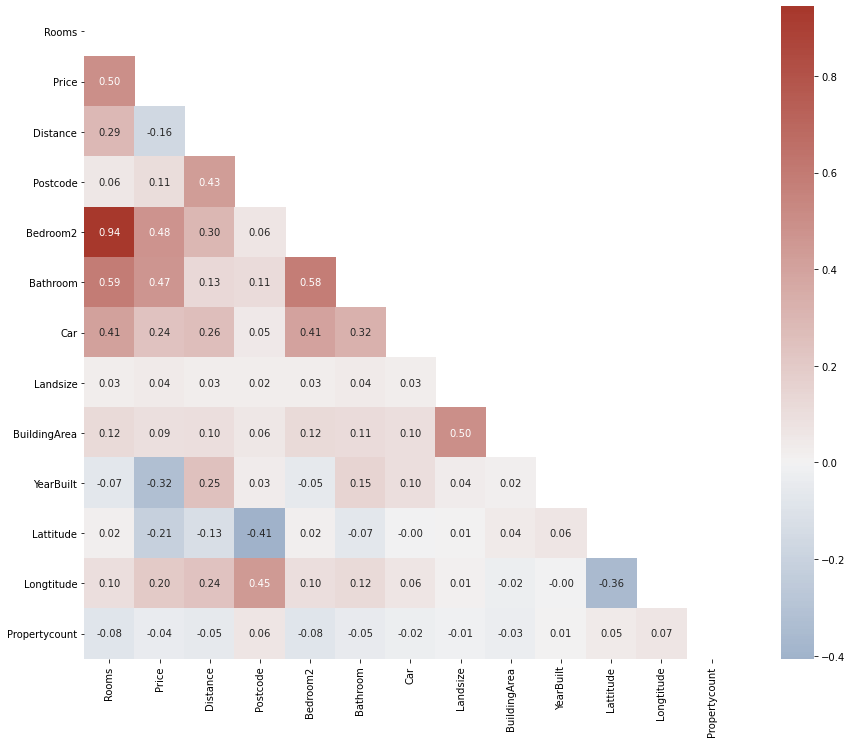

In [99]:
# Calculate pairwise-correlation
matrix = houses.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

The resulting plot is much easier to interpret and free of distractions. First, we build the correlation matrix using `.corr` method of our DataFrame. Then, we use `np.ones_like` function with `dtype` set to `bool` to create a matrix of `True` values with the same shape as our DataFrame:

In [68]:
np.ones_like(matrix, dtype=bool)[:5]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True]])

Then, we pass it to Numpy's `.triu` function which returns a 2D boolean mask which contains `False` values for the lower triangle of the matrix. Then, we can pass it to Seaborn's `heatmap` function to subset the matrix according to this mask:

```python
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
```

I also made a few additions to make the plot a bit nicer like adding a custom color palette.

### 2. Include missing values in `value_counts`

A handy little trick with `value_counts` is that you can see the proportion of missing values in any column by setting `dropna` to False:

In [87]:
houses.CouncilArea.value_counts(dropna=False, normalize=True).head()

NaN              0.100810
Moreland         0.085641
Boroondara       0.085420
Moonee Valley    0.073417
Darebin          0.068778
Name: CouncilArea, dtype: float64

By determining the proportion of values that are missing, you can make a decision as to whether drop or impute them. However, if you want to look at proportion of missing values across all columns, `value_counts` is not the best option. Instead you can do:

In [92]:
missing_props = houses.isna().sum() / len(houses)
missing_props[missing_props > 0].sort_values(ascending=False)

BuildingArea    0.474963
YearBuilt       0.395803
CouncilArea     0.100810
Car             0.004566
dtype: float64

First, find the proportions by dividing the number of missing values by the length of the dataframe. Then, you can filter out columns with 0%, i. e. only choose columns with missing values.

### 3. Using `pandas` dataframe style

Many of us never realize the vast, untapped potential of `pandas`. An underrated and often overlooked feature of `pandas` is its ability to style its DataFrames. Using `.style` attribute of `pandas` DataFrames, you can apply conditional designs and styles to them. As a first example, let's see how you change the background color depending on the value of each cell:

In [97]:
diamonds = sns.load_dataset('diamonds')

pd.crosstab(diamonds.cut, diamonds.clarity).style.background_gradient(cmap='rocket_r')

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,1212,2047,2606,3589,5071,4282,2598,146
Premium,230,616,870,1989,3357,3575,2949,205
Very Good,268,789,1235,1775,2591,3240,2100,84
Good,71,186,286,648,978,1560,1081,96
Fair,9,17,69,170,261,408,466,210


It is almost a heatmap without using Seaborn's heatmap function. Here, we are counting each combination of diamond cut and clarity using `pd.crosstab`. Using `.style.background_gradient`, you can easily spot which combinations occur the most. From the above DataFrame only, we can see that the majority of diamonds are of Ideal cut and the largest combination is with 'VS2'.

We can even take this further by finding the average price of each diamond cut and clarity combination in `crosstab`:

In [101]:
pd.crosstab(diamonds.cut, diamonds.clarity, 
            aggfunc=np.mean, values=diamonds.price).\
            style.background_gradient(cmap='flare')

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,2272.913366,2468.129458,3250.290100,3489.744497,3284.550385,3752.118169,4755.952656,4335.726027
Premium,3856.143478,2831.206169,3795.122989,4485.462041,4550.331248,4455.269371,5545.936928,3947.331707
Very Good,4396.216418,2459.441065,3037.765182,3805.353239,4215.759552,3932.391049,4988.688095,4078.226190
Good,4098.323944,2254.774194,3079.108392,3801.445988,4262.236196,3689.533333,4580.260870,3596.635417
Fair,1912.333333,3871.352941,3349.768116,4165.141176,4174.724138,4208.279412,5173.916309,3703.533333


This time, we are aggregating diamond price for each cut and clarity combination. From the styled dataframe, we can see that the most expensive diamonds have 'VS2' clarity or 'Premium' cut. But it would be better if we could display the aggregated prices by rounding them. We can change that with `.style` too:

In [107]:
agg_prices = pd.crosstab(diamonds.cut, diamonds.clarity, 
                        aggfunc=np.mean, values=diamonds.price).\
                        style.background_gradient(cmap='flare')
agg_prices.format('{:.2f}')

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,2272.91,2468.13,3250.29,3489.74,3284.55,3752.12,4755.95,4335.73
Premium,3856.14,2831.21,3795.12,4485.46,4550.33,4455.27,5545.94,3947.33
Very Good,4396.22,2459.44,3037.77,3805.35,4215.76,3932.39,4988.69,4078.23
Good,4098.32,2254.77,3079.11,3801.45,4262.24,3689.53,4580.26,3596.64
Fair,1912.33,3871.35,3349.77,4165.14,4174.72,4208.28,5173.92,3703.53


By chaining `.format` method with a format string `{:.2f}`, we are specifying a precision of 2 floating points. 

With `.style`, your imagination is the limit. With a little bit of knowledge of CSS, you can build custom styling functions for your needs. Check out the official `pandas` [guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) for more information.

### 4. Configuring Global Plot Settings With Matplotlib

When doing EDA, you will find yourself keeping some settings of Matplotlib the same for all of your plots. For example, you might want to apply a custom palette for all plots, using bigger fonts for tick labels, change the location of legends, using fixed figure sizes, etc.

Specifying each custom change to plots can be pretty boring, repetitive and time-consuming task. Fortunately, you can use `Matplotlib`'s `rcParams` dictionary to set global configs for your plots:

In [119]:
from matplotlib import rcParams

`rcParams` is just a plain-old Python dictionary containing default settings of Matplotlib:

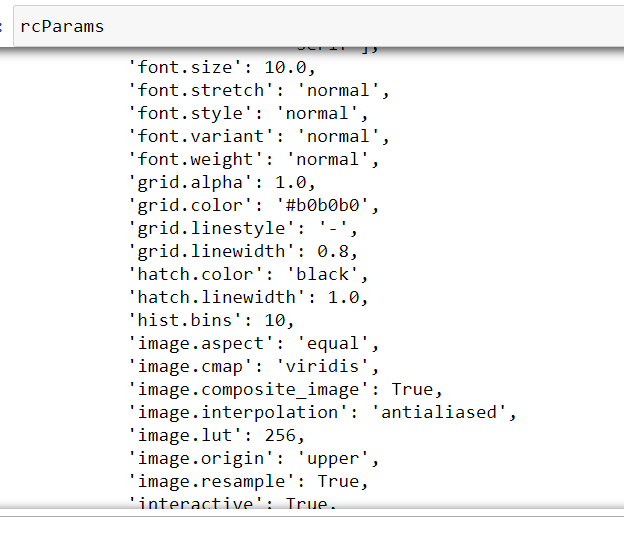

You can tweak pretty much every possible aspect of each individual plot. What I usually do and saw others doing is to set a fixed figure size, ticklabel fontsize and a few others:

In [125]:
# Remove top and right spines
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Set fixed figure size
rcParams['figure.figsize'] = [12, 9]
# Set dots per inch to 300, very high quality images
rcParams['figure.dpi'] = 300
# Enable autolayout
rcParams['figure.autolayout'] = True

# Set global fontsize
rcParams['font.style'] = 16
# Fontsize of ticklabels
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

You can avoid a lot of repetition by setting these right after you import Matplotlib. See all other available settings by calling `rcParams.keys()`.